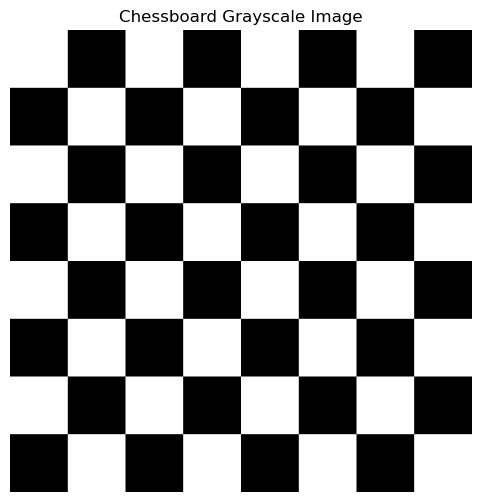

In [29]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from scipy.signal import convolve2d

# Step 1(a): Load a grayscale image (data.coffee)
# image = data.coffee()  # Load the coffee image
# gray_image = color.rgb2gray(image)  # Convert to grayscale
# gray_image = gray_image / 255.0  # Normalize pixel intensities to range [0, 1]

# # Step 1(b): Display the original grayscale image
# plt.figure(figsize=(6, 6))
# plt.title("Original Grayscale Image")
# plt.imshow(gray_image, cmap='gray')
# plt.axis("off")
# plt.show()

# Generate a real chessboard image using OpenCV
chessboard_size = (8, 8)  # Define the number of squares in the chessboard (8x8)
square_size = 50          # Pixel size of each square

# Create a blank chessboard image
chessboard = np.zeros((chessboard_size[0] * square_size, chessboard_size[1] * square_size), dtype=np.uint8)

# Fill alternating squares to create the pattern
for i in range(chessboard_size[0]):
    for j in range(chessboard_size[1]):
        if (i + j) % 2 == 0:
            chessboard[i*square_size:(i+1)*square_size, j*square_size:(j+1)*square_size] = 255

# Normalize the image to [0, 1] range
gray_image = chessboard / 255.0

# Display the generated chessboard
plt.figure(figsize=(6, 6))
plt.title("Chessboard Grayscale Image")
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.show()


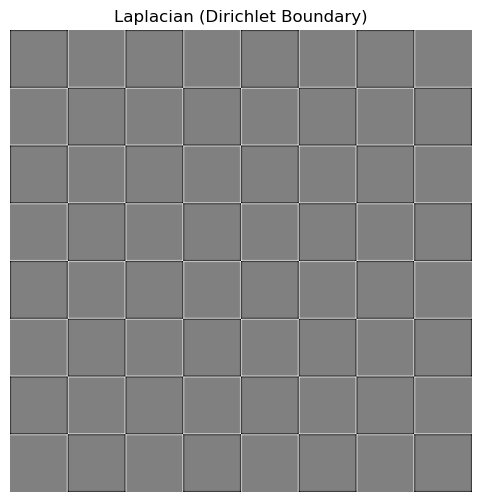

In [31]:
# Step 2: Define the discrete Laplacian operator using the central difference method
laplacian_stencil = np.array([[0, 1, 0],
                               [1, -4, 1],
                               [0, 1, 0]])

def compute_laplacian(grid, boundary='symm'):
    """
    Compute the discrete Laplacian of a 2D grid using the central difference method.
    
    Parameters:
        grid (ndarray): 2D array representing the image or function values.
        boundary (str): Boundary condition ('fill', 'symm', 'wrap').
                        - 'fill': Fixed boundary (Dirichlet), pads with zeros.
                        - 'symm': Mirrored boundary (Neumann).
                        - 'wrap': Periodic boundary (wrap around).
    
    Returns:
        ndarray: The Laplacian of the grid.
    """
    laplacian = convolve2d(grid, laplacian_stencil, mode='same', boundary=boundary)
    return laplacian

# Compute and display Laplacian with Dirichlet boundary conditions
laplacian_image = compute_laplacian(gray_image, boundary='fill')

# Visualize the Laplacian
plt.figure(figsize=(6, 6))
plt.title("Laplacian (Dirichlet Boundary)")
plt.imshow(laplacian_image, cmap='gray')
plt.axis("off")
plt.show()

In [39]:
def heat_equation_solver(grid, laplacian_stencil, kappa, delta_t, time_steps, boundary='symm'):
    """
    Solve the heat equation using an explicit scheme.

    Parameters:
        grid (ndarray): 2D array representing the initial condition (image).
        laplacian_stencil (ndarray): Discrete Laplacian kernel.
        kappa (float): Diffusion constant.
        delta_t (float): Time step size.
        time_steps (int): Number of time steps to evolve.
        boundary (str): Boundary condition ('fill', 'symm', 'wrap').
        
    Returns:
        list: A list of grids at different time steps for visualization.
    """
    u = grid.copy()  # Initialize with the original image
    delta_x = 1  # Assume unit grid spacing (pixels)
    
    # Stability check
    stability_condition = kappa * delta_t / (delta_x ** 2)
    if stability_condition > 0.25:
        raise ValueError(f"Stability condition violated: κ·Δt/(Δx)^2 = {stability_condition:.2f} > 0.25")
    
    grids_over_time = [u.copy()]  # Store states for visualization
    
    for _ in range(time_steps):
        laplacian = compute_laplacian(u, boundary=boundary)
        u += kappa * delta_t * laplacian  # Explicit update rule
        grids_over_time.append(u.copy())
    
    return grids_over_time

# Adjust parameters for a more pronounced smoothing effect
kappa = 0.5       # Increase diffusion constant
delta_t = 0.1     # Increase time step size
time_steps = 200  # Allow more time for diffusion

# Solve the heat equation
evolved_images = heat_equation_solver(gray_image, laplacian_stencil, kappa, delta_t, time_steps, boundary='symm')

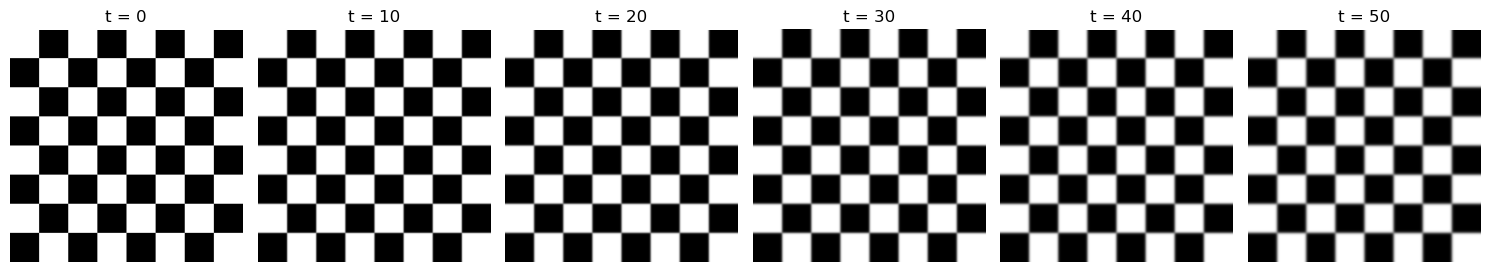

In [41]:
# Visualize the evolution of the image at various time steps
time_points = [0, 10, 20, 30, 40, 50]  # Select time steps for visualization
fig, axes = plt.subplots(1, len(time_points), figsize=(15, 5))

for idx, t in enumerate(time_points):
    axes[idx].imshow(evolved_images[t], cmap='gray')
    axes[idx].set_title(f"t = {t}")
    axes[idx].axis("off")

plt.tight_layout()
plt.show()

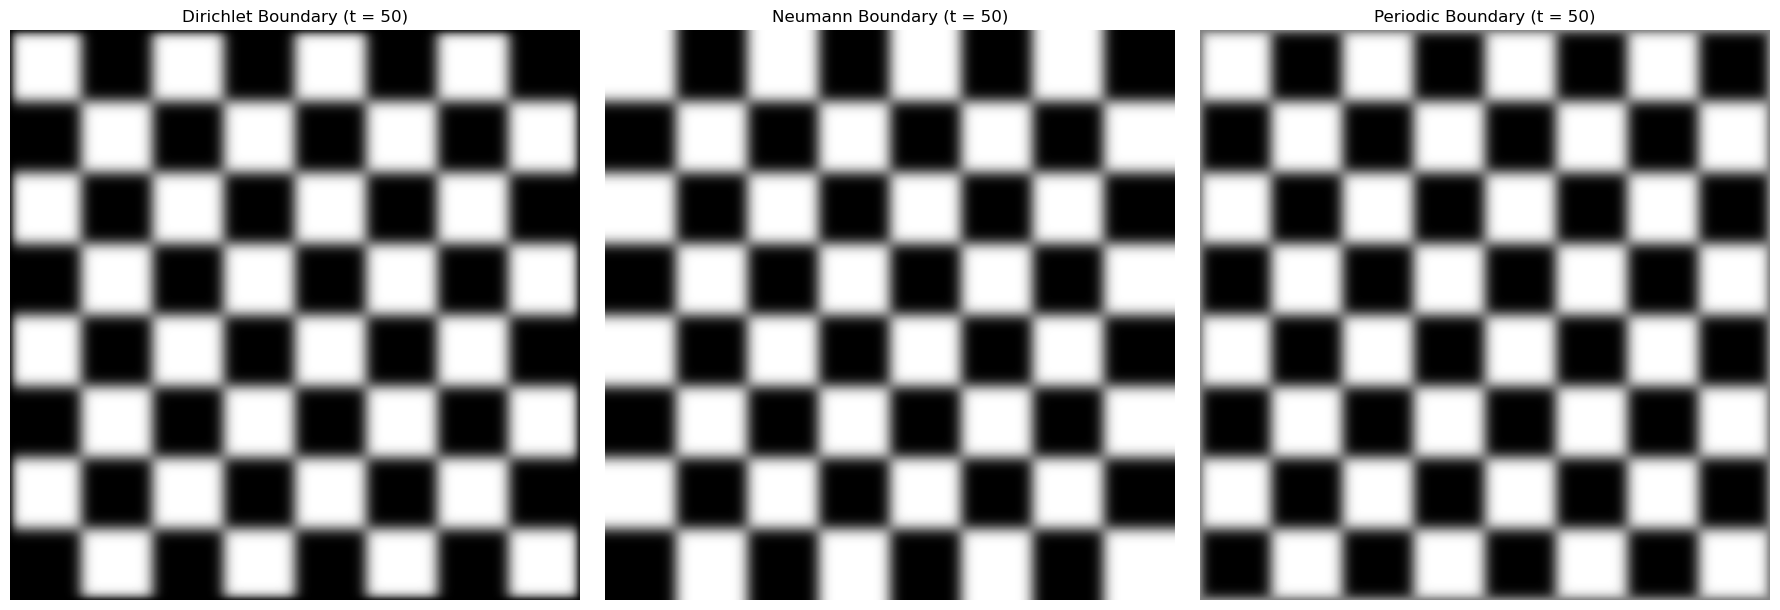

In [43]:
# Compute evolution with different boundary conditions
evolved_dirichlet = heat_equation_solver(gray_image, laplacian_stencil, kappa, delta_t, time_steps, boundary='fill')
evolved_neumann = heat_equation_solver(gray_image, laplacian_stencil, kappa, delta_t, time_steps, boundary='symm')
evolved_periodic = heat_equation_solver(gray_image, laplacian_stencil, kappa, delta_t, time_steps, boundary='wrap')

# Visualize final state for each boundary condition
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(evolved_dirichlet[-1], cmap='gray')
axes[0].set_title("Dirichlet Boundary (t = 50)")
axes[0].axis("off")

axes[1].imshow(evolved_neumann[-1], cmap='gray')
axes[1].set_title("Neumann Boundary (t = 50)")
axes[1].axis("off")

axes[2].imshow(evolved_periodic[-1], cmap='gray')
axes[2].set_title("Periodic Boundary (t = 50)")
axes[2].axis("off")

plt.tight_layout()
plt.show()